In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [34]:
sleepy_eye = pd.read_csv("Resources/08004500_catch.csv")
big_stone = pd.read_csv("Resources/06015200_catch.csv")

In [35]:
northernse = sleepy_eye.loc[(sleepy_eye["species"] == "BLG") & (sleepy_eye["gear"] == "Standard gill nets")]
northernse = northernse.sort_values(by="survey_date")
northernse.head()

,CPUE,averageWeight,gear,gearCount,quartileCount,quartileWeight,species,survey_ID,survey_date,totalCatch,totalWeight
173,0.17,0.12,Standard gill nets,6.0,NaN,NaN,BLG,117289,1983-07-20,1,0.12
203,0.50,0.22,Standard gill nets,4.0,NaN,NaN,BLG,117297,1991-07-15,2,0.44
6,1.00,0.20,Standard gill nets,1.0,NaN,NaN,BLG,117310,1995-08-10,1,90.00
69,2.00,0.14,Standard gill nets,2.0,NaN,NaN,BLG,117312,1996-08-28,4,248.00
114,9.67,0.19,Standard gill nets,3.0,NaN,NaN,BLG,117316,1997-07-21,29,2443.00


In [36]:
northernbs = big_stone.loc[(big_stone["species"] == "BLG") & (big_stone["gear"] == "Standard gill nets")]
northernbs = northernbs.sort_values(by="survey_date")
northernbs.head()

,CPUE,averageWeight,gear,gearCount,quartileCount,quartileWeight,species,survey_ID,survey_date,totalCatch,totalWeight
1164,0.29,0.14,Standard gill nets,14.0,NaN,NaN,BLG,117383,1985-07-08,4,0.55
12,0.10,0.40,Standard gill nets,20.0,NaN,NaN,BLG,117389,1987-09-01,2,0.80
1367,0.10,0.50,Standard gill nets,20.0,NaN,NaN,BLG,117397,1989-07-12,2,1.00
320,0.17,0.35,Standard gill nets,12.0,NaN,NaN,BLG,117410,1992-06-01,2,0.70
920,0.08,0.35,Standard gill nets,12.0,NaN,NaN,BLG,117420,1993-05-17,1,160.00


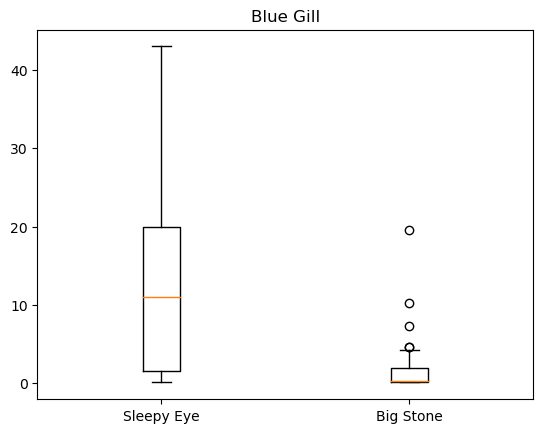

In [37]:
plt.boxplot([northernse["CPUE"], northernbs["CPUE"]])
labels = ["Sleepy Eye", "Big Stone"]
ticks = [1,2]
plt.xticks(ticks=ticks, labels=labels)
plt.title("Blue Gill")
plt.show()

In [5]:
northern["survey_date"] = pd.to_datetime(northern["survey_date"],format="%Y-%m-%d")
northern["survey_date"]

161   1983-07-20
94    1986-07-16
196   1991-07-15
225   1992-07-20
40    1994-08-25
0     1995-08-10
61    1996-08-28
106   1997-07-21
72    1998-08-10
175   1999-09-07
49    2000-08-21
213   2001-08-21
117   2002-08-26
83    2003-08-19
147   2004-09-08
14    2011-06-20
130   2016-06-20
187   2021-08-16
Name: survey_date, dtype: datetime64[ns]

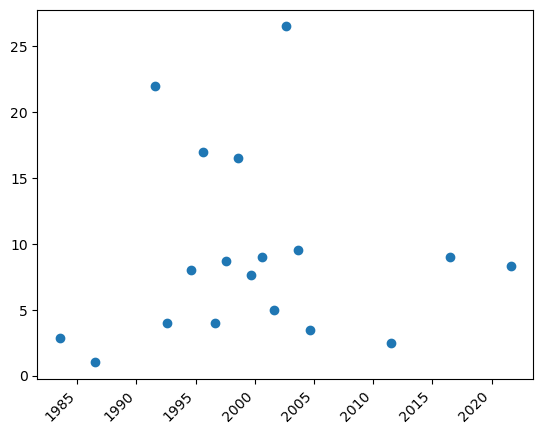

In [6]:
plt.scatter(northern["survey_date"],northern["CPUE"])
plt.xticks(rotation=45, ha="right")
plt.show()